### Even smaller scales:

In [3]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
from os import path as op

In [6]:
dir_fft = '/scratch/06536/qezlou/Goku/processed_data/fft_corr/1d/'
dir_pcount = '/scratch/06536/qezlou/Goku/processed_data/1d/'

fft_files, pcount_files= [], []
for i in [200,201, 483, 484]:
    fft_files.append(op.join(dir_fft,f'Zheng07_seeds_compressed_10p_Box250_Part750_{str(i).rjust(4,"0")}.hdf5'))
    pcount_files.append(op.join(dir_pcount,f'Zheng07_seeds_compressed_10p_Box250_Part750_{str(i).rjust(4,"0")}.hdf5'))

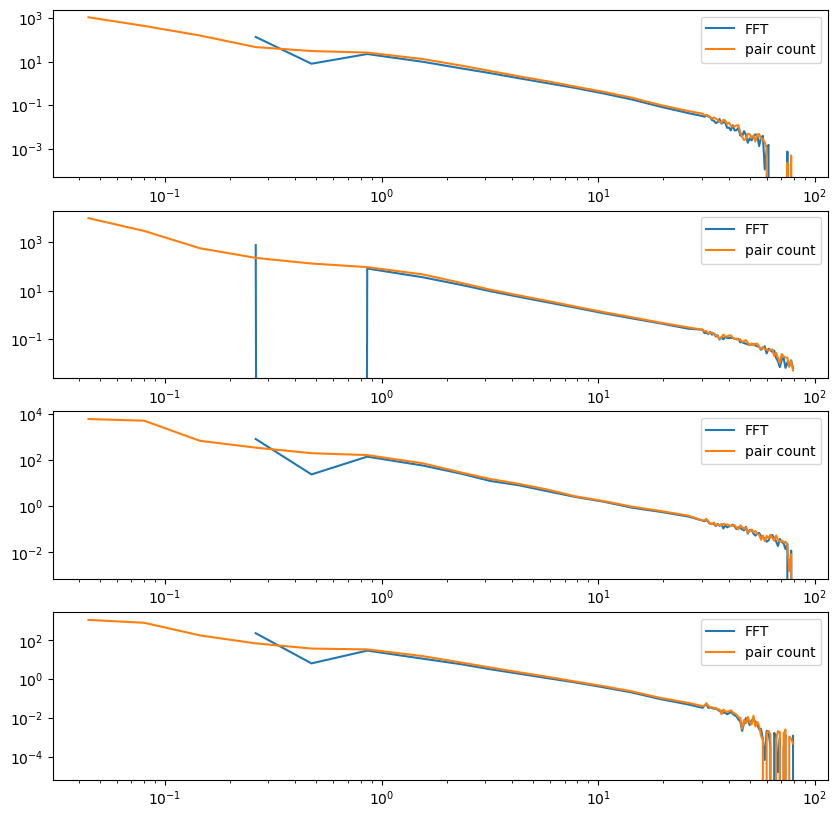

In [17]:
fig, ax= plt.subplots(4,1, figsize=(10,10))
for i in range(4):
    with h5py.File(fft_files[i],'r') as f:
        r_fft = f['r'][:]
        corr_fft = np.squeeze(f['corr'][:])
    with h5py.File(pcount_files[i],'r') as f:
        r_pcount = f['r'][:]
        corr_pcount = np.squeeze(f['corr'][:])
    ax[i].plot(r_fft, corr_fft, label='FFT')
    ax[i].plot(r_pcount, corr_pcount, label='pair count')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].legend()

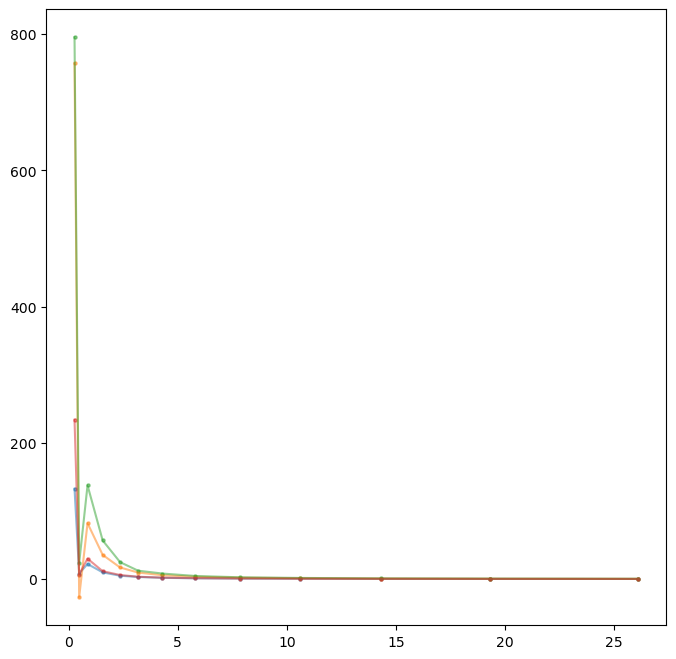

In [19]:
import numpy as np
from glob import glob
from os import path as op
import importlib
import plot
importlib.reload(plot)
plot_corr = plot.PlotCorr()

plot_corr.compare_cosmos(fft_files, savefig=None, r_range=(0, 30), mode='1d')